In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
import scipy.stats as scs

In [2]:
df = pd.read_csv('data/combined_data/200124_final_data.csv')
df = df.drop(columns={'Unnamed: 0'})
print(df.head())
print(df.shape)

       C  Charpy     Cr     Cu  Diffusible Hydrogen  Elongation  Lateral  \
0  0.150    27.0  0.200    NaN                  4.0        22.0      NaN   
1  0.055   226.5  0.045    NaN                  2.5        31.0      NaN   
2    NaN     NaN    NaN    NaN                  NaN        22.0      NaN   
3    NaN    95.0    NaN    NaN                  NaN        28.5      NaN   
4  0.075     NaN  6.000  0.005                  NaN        19.0      NaN   

     Mn  Mn + Ni + Cr + Mo + V    Mo  ...  Redry_Time  Redrying_Temp  Rm  Rp0  \
0  1.60                  1.750  0.30  ...         NaN            NaN NaN  NaN   
1  1.28                  1.395  0.05  ...         NaN            NaN NaN  NaN   
2   NaN                    NaN   NaN  ...         NaN            NaN NaN  NaN   
3   NaN                    NaN   NaN  ...         NaN            NaN NaN  NaN   
4  0.70                    NaN  0.15  ...         NaN            NaN NaN  NaN   

   Sn  Suitable_For  Ti  Zn  Zr  url  
0 NaN           N

In [44]:
def drop_txt_rows(data):
    for col in data.columns:
        if data[col].dtype ==object:
            data = data.drop(col, axis=1)  
    data = data.fillna(0)
    return data
            
df = drop_txt_rows(df)

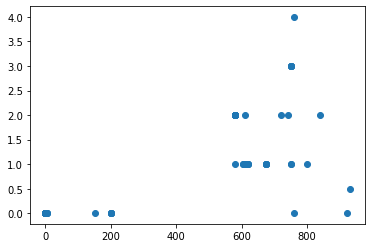

In [45]:
plt.scatter(df['HT_Temp'],df['HT_Time'])

/home/prasann/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/prasann/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


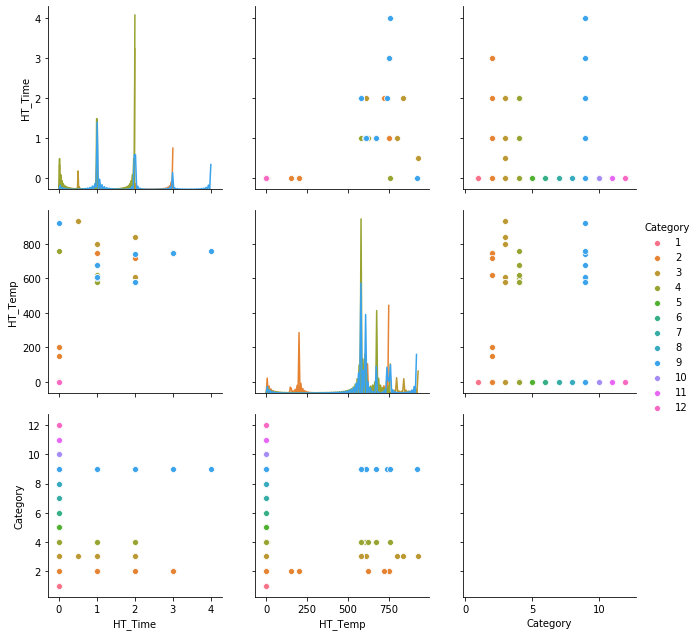

In [48]:
sns.pairplot(df[{'HT_Temp', 'HT_Time','Category' }], hue='Category' ,height=3);
plt.show()

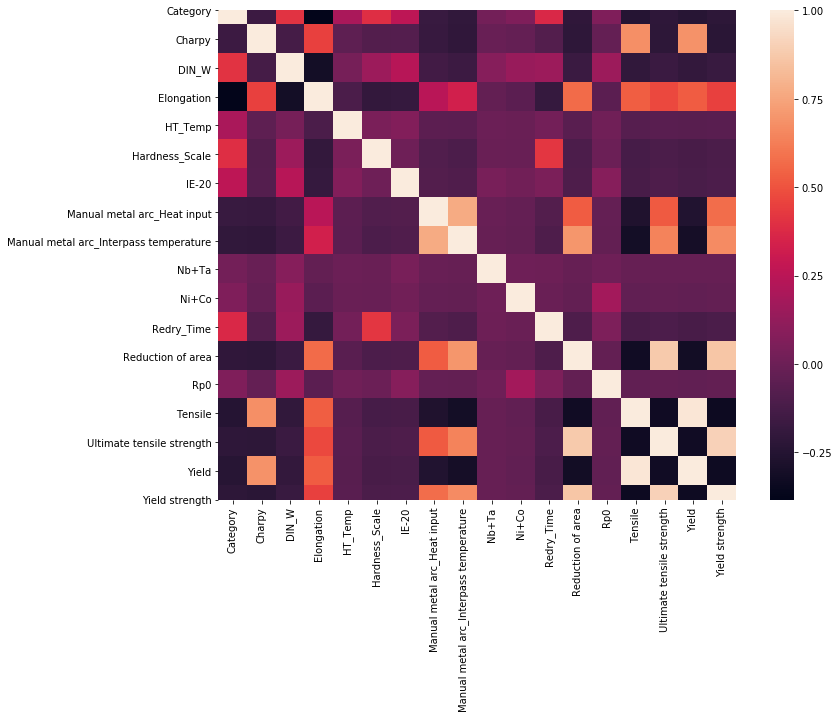

In [57]:
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, square=True)

In [ ]:
f, ax = plt.subplots(51,figsize=(12,9))
i = 0
for col in df.columns:
    sns.distplot(df[col], a=ax[i])
    i+=1
    

In [9]:
#Getting columns
for c in df.columns:
    print(c)


C
Charpy
Cr
Cu
Diffusible Hydrogen
Elongation
Lateral
Mn
Mn + Ni + Cr + Mo + V
Mo
Ni
P
P S
S
S Ni
Si
Tensile
V
Yield
aws
conformances
ind
key features
requirements
typic_results
typical applications
Elongation_Temperature
Reduction of area
Reduction of area_Temperature
Ultimate tensile strength
Ultimate tensile strength_Temperature
Yield strength
Yield strength_Temperature
Acicular ferrite
Acicular ferrite_Temperature
Ferrite with carbide aggregate
Ferrite with carbide aggregate_Temperature
Ferrite with second phase
Ferrite with second phase_Temperature
Primary ferrite in microstructure
Primary ferrite in microstructure_Temperature
50% FATT
50% FATT_Temperature
Hardness
Hardness_Temperature
Manual metal arc_Current
Manual metal arc_Electrode
Manual metal arc_Heat input
Manual metal arc_Interpass temperature
Manual metal arc_Source
Manual metal arc_Voltage
Post weld heat treatment_Post weld heat treatment temperature
Post weld heat treatment_Post weld heat treatment time
Flux cored arc_

In [11]:
pd.DataFrame(df.columns).to_json('columns.json', orient= 'index')

In [3]:
df = df.dropna(axis='columns', thresh = 250)

In [32]:
numvals = pd.DataFrame(df.count()).transpose()

In [36]:
numvals.to_json('value_counts.json', orient='index')

In [37]:
numvals.shape

(1, 73)

In [4]:
df

,C,Charpy,Cr,Cu,Elongation,Mn,Mo,Ni,P,S,...,Properties,Redry_Time,Rm,Rp0,Sn,Suitable_For,Ti,Zn,Zr,url
0,0.150,27.0,0.200,NaN,22.0,1.60,0.30,NaN,0.035,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.055,226.5,0.045,NaN,31.0,1.28,0.05,NaN,0.015,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,95.0,NaN,NaN,28.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.075,NaN,6.000,0.005,19.0,0.70,0.15,NaN,0.012,0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,0.080,NaN,0.000,0.000,NaN,0.60,0.00,0.0,0.000,0.000,...,6013 T is a thick coated electrode for joining...,2.0,560.0,360.0,0.0,\n\nDIN:Unalloyed steels:Boiler plates:Pipe st...,0.0,0.0,0.0,http://www.ceweld.nl/en/product/6013-t
3251,0.030,NaN,0.000,0.000,NaN,0.42,0.00,0.0,0.015,0.012,...,Extremely crack resistant weld metal condition...,1.0,505.0,400.0,0.0,\n\nMaterials\nEN\nASTM\n\n\nshipbuilding stee...,0.0,0.0,0.0,http://www.ceweld.nl/en/product/6018-lc
3252,0.100,NaN,0.000,0.000,NaN,0.40,0.50,0.0,0.000,0.000,...,Besides the excellent weld metal toughness pro...,0.0,550.0,420.0,0.0,"St:37.2, 44.2, 37.3, 52.3, H1, H11, 210.7, 290...",0.0,0.0,0.0,http://www.ceweld.nl/en/product/7010
3253,0.050,NaN,0.000,0.000,NaN,1.00,0.00,0.0,0.000,0.000,...,Doublcoated semi basic CTOD tested electrode w...,1.0,575.0,420.0,0.0,\n\nBase metal\nDIN\nEN\nASTM\n\n\nShipbuildin...,0.0,0.0,0.0,http://www.ceweld.nl/en/product/7016


In [12]:
def get_elements(df):
    new_cols = []
    for c in df.columns:
        if len(c)<3:
            new_cols.append(c)
            
    return df[new_cols]

In [9]:
get_elements(df)

,C,Cr,Cu,Mn,Mo,Ni,P,S,Si,V,...,B,Be,Mg,N,Nb,Rm,Sn,Ti,Zn,Zr
0,0.150,0.200,NaN,1.60,0.30,NaN,0.035,NaN,0.750,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.055,0.045,NaN,1.28,0.05,NaN,0.015,NaN,0.510,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.075,6.000,0.005,0.70,0.15,NaN,0.012,0.015,0.225,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,0.080,0.000,0.000,0.60,0.00,0.0,0.000,0.000,0.450,0.00,...,0.0,0.0,0.0,0.0,0.0,560.0,0.0,0.0,0.0,0.0
3251,0.030,0.000,0.000,0.42,0.00,0.0,0.015,0.012,0.270,0.00,...,0.0,0.0,0.0,0.0,0.0,505.0,0.0,0.0,0.0,0.0
3252,0.100,0.000,0.000,0.40,0.50,0.0,0.000,0.000,0.150,0.00,...,0.0,0.0,0.0,0.0,0.0,550.0,0.0,0.0,0.0,0.0
3253,0.050,0.000,0.000,1.00,0.00,0.0,0.000,0.000,0.650,0.00,...,0.0,0.0,0.0,0.0,0.0,575.0,0.0,0.0,0.0,0.0


In [ ]:
df.to_json('composition_data.json', orient='index')

In [28]:
elements = get_elements(df)
get_elems_list(elements, elements.columns)

TypeError: must be real number, not str

In [9]:
import math
def get_elems_list(row, cols):
    elem_comb = {}
    elem_list = []
    i = 0
    for a in row:
        if not math.isnan(a):
            elem_list.append(cols[i])
        i+=1
    elem_comb['elements'] = elem_list
    return elem_comb

def get_data_rep(df):
    elements = get_elements(df)
    ecols = elements.columns
    data = df.drop(columns = ecols)
    e = pd.DataFrame()
    for i in range (0, len(elements)):
        e =e.append(get_elems_list(elements.loc[i], ecols), ignore_index=True)
    print(e)
    data['elements'] = e['elements']
    return data

def get_oth_props(df):
    elements = get_elements(df)
    ecols = elements.columns
    data = df.drop(columns = ecols)
    return data

In [45]:
tmp = get_data_rep(df)

                                               elements
0                             [C, Cr, Mn, Mo, P, Si, V]
1                             [C, Cr, Mn, Mo, P, Si, V]
2                                                    []
3                                                    []
4                         [C, Cr, Cu, Mn, Mo, P, S, Si]
...                                                 ...
3250  [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3251  [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3252  [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3253  [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3254  [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...

[3255 rows x 1 columns]


In [46]:
tmp['elements']

0                               [C, Cr, Mn, Mo, P, Si, V]
1                               [C, Cr, Mn, Mo, P, Si, V]
2                                                      []
3                                                      []
4                           [C, Cr, Cu, Mn, Mo, P, S, Si]
                              ...                        
3250    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3251    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3252    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3253    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3254    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
Name: elements, Length: 3255, dtype: object

In [101]:
tmp.select_dtypes(['number']).columns

Index(['Charpy', 'Elongation', 'Tensile', 'Yield', 'ind', 'Reduction of area',
       'Ultimate tensile strength', 'Yield strength',
       'Manual metal arc_Heat input', 'Manual metal arc_Interpass temperature',
       'extr', 'Category', 'DIN_W', 'HT_Temp', 'Hardness_Scale', 'IE-20',
       'Nb+Ta', 'Ni+Co', 'Others', 'Redry_Time', 'Rp0'],
      dtype='object')

In [54]:
tmp.to_hdf('props_data.hdf5', 'props')

/home/prasann/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['aws', 'conformances', 'key features', 'requirements', 'typic_results', 'typical applications', 'Elongation_Temperature', 'Reduction of area_Temperature', 'Ultimate tensile strength_Temperature', 'Yield strength_Temperature', 'Hardness', 'Manual metal arc_Current', 'Manual metal arc_Electrode', 'Manual metal arc_Source', 'Manual metal arc_Voltage', 'Post weld heat treatment_Post weld heat treatment temperature', 'Post weld heat treatment_Post weld heat treatment time', 'AWS', 'Applications', 'DIN', 'Heat_Treated_As', 'ISO', 'Name', 'Properties', 'Suitable_For', 'url', 'elements']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [58]:
pd.read_hdf('props_data.hdf5', 'props')['elements']

0                               [C, Cr, Mn, Mo, P, Si, V]
1                               [C, Cr, Mn, Mo, P, Si, V]
2                                                      []
3                                                      []
4                           [C, Cr, Cu, Mn, Mo, P, S, Si]
                              ...                        
3250    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3251    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3252    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3253    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
3254    [C, Cr, Cu, Mn, Mo, Ni, P, S, Si, V, Fe, W, Co...
Name: elements, Length: 3255, dtype: object

In [59]:
pd.__version__

'0.25.1'

In [8]:
def get_counts_df(data):
    return pd.DataFrame(data.count()).transpose()
prop_counts = get_counts_df(get_oth_props(df))

def numerify_df(data):
    for c in data.columns:
        try:
            data[c] = data[c].astype(float)
        except:
            print(c)
    return data

NameError: name 'get_oth_props' is not defined

In [64]:
prop_counts

,Charpy,Elongation,Tensile,Yield,aws,conformances,ind,key features,requirements,typic_results,...,ISO,Name,Nb+Ta,Ni+Co,Others,Properties,Redry_Time,Rp0,Suitable_For,url
0,758,1618,919,919,944,513,944,583,944,944,...,630,661,661,661,661,581,661,413,644,661


In [65]:
df.to_json('prop_counts_2.json', orient='index')

In [ ]:
numerify_df(df)

In [70]:
df['Manual metal arc_Current'].

714

In [5]:
def notnulls(data, col):
    return data[data[col].notnull()][col]

In [98]:
df['Hardness'] = df['Hardness'].str.split('(').str.get(0).astype(float)

In [4]:
notnulls(df.replace('N', np.nan),'Hardness')

NameError: name 'notnulls' is not defined

In [6]:
df = df.replace('N', np.nan)

In [7]:
df = numerify_df(df)

NameError: name 'numerify_df' is not defined

In [10]:
df = df.drop(axis='columns', columns = {'Manual metal arc_Electrode','Ultimate tensile strength_Temperature' })

In [13]:
oth_props = get_oth_props(df).select_dtypes(['number'])

In [14]:
tmp_df = get_data_rep(df)

                                               elements
0                             [C, Cr, Mn, Mo, P, Si, V]
1                             [C, Cr, Mn, Mo, P, Si, V]
2                                                    []
3                                                    []
4                         [C, Cr, Cu, Mn, Mo, P, S, Si]
...                                                 ...
3250  [A5, Ag, Al, B, Be, C, Co, Cr, Cu, Fe, Mg, Mn,...
3251  [A5, Ag, Al, B, Be, C, Co, Cr, Cu, Fe, Mg, Mn,...
3252  [A5, Ag, Al, B, Be, C, Co, Cr, Cu, Fe, Mg, Mn,...
3253  [A5, Ag, Al, B, Be, C, Co, Cr, Cu, Fe, Mg, Mn,...
3254  [Ag, Al, B, Be, C, Co, Cr, Cu, Fe, Mg, Mn, Mo,...

[3255 rows x 1 columns]


In [15]:
#tmp_df= df.drop(axis='columns', columns = {'Manual metal arc_Electrode','Ultimate tensile strength_Temperature' })
tmp_df = tmp_df.select_dtypes(['number']).join(tmp_df['elements'])

In [16]:
tmp_df

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Nb+Ta,...,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength,extr,ind,elements
0,NaN,27.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,490.0,NaN,400.0,NaN,NaN,0.0,"[C, Cr, Mn, Mo, P, Si, V]"
1,NaN,226.5,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,557.5,NaN,470.0,NaN,NaN,1.0,"[C, Cr, Mn, Mo, P, Si, V]"
10,NaN,27.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,550.0,NaN,510.0,NaN,NaN,161.0,[]
100,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,550.0,NaN,460.0,NaN,NaN,289.0,"[C, Mn, Mo, P, S, Si]"
1000,NaN,NaN,NaN,26.0,NaN,NaN,NaN,1.0,150.0,NaN,...,NaN,78.8,NaN,NaN,560.0,NaN,484.0,1.0,NaN,"[C, Cu, Fe, Mn, P, S, Si]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,"[C, Fe, Mn, Ni, P, S, Si]"
996,NaN,NaN,NaN,26.6,NaN,NaN,NaN,1.0,200.0,NaN,...,NaN,70.8,NaN,NaN,677.0,NaN,584.0,1.0,NaN,"[C, Fe, Mn, Ni, P, S, Si]"
997,NaN,NaN,NaN,22.2,NaN,NaN,NaN,1.0,200.0,NaN,...,NaN,69.7,NaN,NaN,753.0,NaN,692.0,1.0,NaN,"[C, Fe, Mn, Ni, P, S, Si]"
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,"[C, Fe, Mn, Ni, P, S, Si]"


In [ ]:
tmp_df.to_hdf('final_data.hdf', 'props')

In [2]:
df = pd.read_hdf('final_data.hdf', 'props')

In [2]:
df = pd.read_json('composition_data.json', orient = 'index')

In [20]:
tmp_df.columns

Index(['Category', 'Charpy', 'DIN_W', 'Elongation', 'HT_Temp',
       'Hardness_Scale', 'IE-20', 'Manual metal arc_Heat input',
       'Manual metal arc_Interpass temperature', 'Nb+Ta', 'Ni+Co', 'Others',
       'Redry_Time', 'Reduction of area', 'Rp0', 'Tensile',
       'Ultimate tensile strength', 'Yield', 'Yield strength', 'extr', 'ind',
       'elements'],
      dtype='object')

In [27]:
#tmp_df = tmp_df.drop(columns={'ind', 'Others'})
tmp_df = tmp_df.drop(columns={'extr'})

In [44]:
tmp_df

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Nb+Ta,Ni+Co,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength,elements
0,NaN,27.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.0,NaN,400.0,NaN,"[C, Cr, Mn, Mo, P, Si, V]"
1,NaN,226.5,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557.5,NaN,470.0,NaN,"[C, Cr, Mn, Mo, P, Si, V]"
10,NaN,27.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,NaN,510.0,NaN,[]
100,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,NaN,460.0,NaN,"[C, Mn, Mo, P, S, Si]"
1000,NaN,NaN,NaN,26.0,NaN,NaN,NaN,1.0,150.0,NaN,NaN,NaN,78.8,NaN,NaN,560.0,NaN,484.0,"[C, Cu, Fe, Mn, P, S, Si]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[C, Fe, Mn, Ni, P, S, Si]"
996,NaN,NaN,NaN,26.6,NaN,NaN,NaN,1.0,200.0,NaN,NaN,NaN,70.8,NaN,NaN,677.0,NaN,584.0,"[C, Fe, Mn, Ni, P, S, Si]"
997,NaN,NaN,NaN,22.2,NaN,NaN,NaN,1.0,200.0,NaN,NaN,NaN,69.7,NaN,NaN,753.0,NaN,692.0,"[C, Fe, Mn, Ni, P, S, Si]"
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[C, Fe, Mn, Ni, P, S, Si]"


In [29]:
df = tmp_df

In [4]:
df = df.drop(columns={'Nb+Ta', "Ni+Co", 'extr', 'ind', 'elements', 'Others'})

In [46]:
#np.mean(df)
tset, pval = ttest_1samp(df, 60)

In [5]:
df = df.fillna(0)

In [50]:
tset, pval = ttest_1samp(df, 60)

In [6]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [13]:
#get p-values, pearsonr correlation coefficients. Null Hypothesis is that 2 values are uncorrellated 
calculate_pvalues(df)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength
Category,0,0,0,0,0,0,0,0,0,0,0,0.0003,0,0,0,0
Charpy,0,0,0,0,0.006,0,0,0,0,0,0,0.1686,0,0,0,0
DIN_W,0,0,0,0,0.0587,0,0,0,0,0,0,0,0,0,0,0
Elongation,0,0,0,0,0,0,0,0,0,0,0,0.0015,0,0,0,0
HT_Temp,0,0.006,0.0587,0,0,0.011,0,0.0038,0.0009,0.1465,0.0006,0.4605,0,0.0005,0.0001,0.0003
Hardness_Scale,0,0,0,0,0.011,0,0.5525,0,0,0,0,0.994,0,0,0,0
IE-20,0,0,0,0,0,0.5525,0,0,0,0.0048,0,0,0,0,0,0
Manual metal arc_Heat input,0,0,0,0,0.0038,0,0,0,0,0,0,0.1473,0,0,0,0
Manual metal arc_Interpass temperature,0,0,0,0,0.0009,0,0,0,0,0,0,0.0963,0,0,0,0
Redry_Time,0,0,0,0,0.1465,0,0.0048,0,0,0,0,0.001,0,0,0,0


In [82]:
#Calculating 

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength
0,0.0,27.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,490.0,0.0,400.0,0.0
1,0.0,226.5,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,557.5,0.0,470.0,0.0
10,0.0,27.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,510.0,0.0
100,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,460.0,0.0
1000,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,150.0,0.0,78.8,0.0,0.0,560.0,0.0,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,26.6,0.0,0.0,0.0,1.0,200.0,0.0,70.8,0.0,0.0,677.0,0.0,584.0
997,0.0,0.0,0.0,22.2,0.0,0.0,0.0,1.0,200.0,0.0,69.7,0.0,0.0,753.0,0.0,692.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
val = abs(np.mean(df['Charpy'])-np.mean(df['DIN_W']))

In [28]:
ztest ,pval1 = stests.ztest(df['Charpy'], x2=df['DIN_W'], alternative='two-sided')

In [6]:
def get_corrs(df, func, ind):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            try:
                pvalues[r][c] = round(func(df[r], df[c])[ind], 4)
            except:
                print('err here')
    return pvalues

In [50]:
#Performs z test, switch ind to 1 to get p-values
get_corrs(df, stests.ztest, 0)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength
Category,0,22.301,-17.1722,50.019,5.9506,-19.2893,10.079,-14.9813,27.9859,-0.8738,27.9203,3.2971,35.0684,29.9874,34.2102,31.0915
Charpy,-22.301,0,-23.3833,-4.8798,-4.506,-23.5067,-4.0927,-23.2536,16.3386,-22.3144,0.0157,2.9668,31.5767,26.3806,30.0368,26.9484
DIN_W,17.1722,23.3833,0,53.8003,6.467,-5.6652,10.7899,5.5386,28.4669,8.4566,29.3005,3.3125,35.2183,30.1439,34.3876,31.2693
Elongation,-50.019,4.8798,-53.8003,0,-2.4558,-54.1722,-1.4315,-53.4109,20.0139,-48.5999,5.9622,3.0432,32.5887,27.4007,31.2731,28.1508
HT_Temp,-5.9506,4.506,-6.467,2.4558,0,-6.5274,1.1441,-6.4035,16.5982,-5.9978,4.6826,3.1167,32.0326,26.9815,30.4432,27.4785
Hardness_Scale,19.2893,23.5067,5.6652,54.1722,6.5274,0,10.8727,11.2097,28.5225,9.5802,29.4554,3.3143,35.2358,30.1622,34.4083,31.29
IE-20,-10.079,4.0927,-10.7899,1.4315,-1.1441,-10.8727,0,-10.703,17.6318,-10.1325,4.3568,3.0748,32.2244,27.1059,30.7447,27.7073
Manual metal arc_Heat input,14.9813,23.2536,-5.5386,53.4109,6.4035,-11.2097,10.703,0,28.4085,7.2809,29.138,3.3106,35.1999,30.1247,34.3659,31.2475
Manual metal arc_Interpass temperature,-27.9859,-16.3386,-28.4669,-20.0139,-16.5982,-28.5225,-17.6318,-28.4085,0,-28.0105,-16.8541,2.3789,25.0298,19.7229,22.2815,19.3244
Redry_Time,0.8738,22.3144,-8.4566,48.5999,5.9978,-9.5802,10.1325,-7.2809,28.0105,0,27.8702,3.2987,35.0808,30.0007,34.2243,31.106


In [30]:
def categories(series):
    return range(int(series.min()), int(series.max()) + 1)


def chi_square_df(df_col1,df_col2):
    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]
    return scs.chi2_contingency(result)


In [ ]:
added = df + 0.00000000000000000001
added['Elongation']

In [43]:
def get_chi_corrs(df, func, ind):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            try:
                a  = []
                a.append(r)
                a.append(c)
                pvalues[r][c] = round(func(df[a])[ind], 4)
            except:
                print('err here')
    return pvalues

In [44]:
scs.chi2_contingency(added[{'Charpy', 'Category'}])

(53356.5, 0.0, 3254, array([[2.55522476e+01, 1.44775238e+00],
        [2.14354966e+02, 1.21450339e+01],
        [2.55522476e+01, 1.44775238e+00],
        ...,
        [1.89275908e-20, 1.07240917e-21],
        [1.89275908e-20, 1.07240917e-21],
        [1.89275908e-20, 1.07240917e-21]]))

In [49]:
get_chi_corrs(added,scs.chi2_contingency, 0)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength
Category,0,53356.5,977.96,42371.1,29001.2,949.722,22714.2,3765.77,138112,3102.2,53399.3,239998,531796,436192,439842,399144
Charpy,53356.5,0,51124.7,39209.4,79198.5,50862.5,85349.3,51400.3,185746,53124.5,101034,529410,36205.1,483827,34163,446778
DIN_W,977.96,51124.7,0,40139.3,28575.4,714.49,18903.2,1533.96,135880,2426.16,51167.5,127036,529564,433960,437610,396912
Elongation,42371.1,39209.4,40139.3,0,68213.1,39877.1,74363.9,12855.9,105317,42139.1,36793.4,518425,254566,254434,213091,227635
HT_Temp,29001.2,79198.5,28575.4,68213.1,0,28030.8,56166.7,29607.8,163954,30493.1,79241.3,306966,557638,462034,465684,424986
Hardness_Scale,949.722,50862.5,714.49,39877.1,28030.8,0,30127.3,1271.77,135618,1612.87,50905.3,373317,529302,433698,437348,396650
IE-20,22714.2,85349.3,18903.2,74363.9,56166.7,30127.3,0,35758.5,170105,26961.9,85392.1,270314,563788,468185,471834,431136
Manual metal arc_Heat input,3765.77,51400.3,1533.96,12855.9,29607.8,1271.77,35758.5,0,7328.96,3533.77,15962.9,479820,529839,110008,437885,67180
Manual metal arc_Interpass temperature,138112,185746,135880,105317,163954,135618,170105,7328.96,0,137880,45502.9,614166,664186,136169,572232,110503
Redry_Time,3102.2,53124.5,2426.16,42139.1,30493.1,1612.87,26961.9,3533.77,137880,0,53167.3,269262,531564,435960,439610,398912


In [54]:
get_corrs(df, scs.ttest_ind, 0)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength
Category,0,22.301,-17.1722,50.019,5.9506,-19.2893,10.079,-14.9813,27.9859,-0.8738,27.9203,3.2971,35.0684,29.9874,34.2102,31.0915
Charpy,-22.301,0,-23.3833,-4.8798,-4.506,-23.5067,-4.0927,-23.2536,16.3386,-22.3144,0.0157,2.9668,31.5767,26.3806,30.0368,26.9484
DIN_W,17.1722,23.3833,0,53.8003,6.467,-5.6652,10.7899,5.5386,28.4669,8.4566,29.3005,3.3125,35.2183,30.1439,34.3876,31.2693
Elongation,-50.019,4.8798,-53.8003,0,-2.4558,-54.1722,-1.4315,-53.4109,20.0139,-48.5999,5.9622,3.0432,32.5887,27.4007,31.2731,28.1508
HT_Temp,-5.9506,4.506,-6.467,2.4558,0,-6.5274,1.1441,-6.4035,16.5982,-5.9978,4.6826,3.1167,32.0326,26.9815,30.4432,27.4785
Hardness_Scale,19.2893,23.5067,5.6652,54.1722,6.5274,0,10.8727,11.2097,28.5225,9.5802,29.4554,3.3143,35.2358,30.1622,34.4083,31.29
IE-20,-10.079,4.0927,-10.7899,1.4315,-1.1441,-10.8727,0,-10.703,17.6318,-10.1325,4.3568,3.0748,32.2244,27.1059,30.7447,27.7073
Manual metal arc_Heat input,14.9813,23.2536,-5.5386,53.4109,6.4035,-11.2097,10.703,0,28.4085,7.2809,29.138,3.3106,35.1999,30.1247,34.3659,31.2475
Manual metal arc_Interpass temperature,-27.9859,-16.3386,-28.4669,-20.0139,-16.5982,-28.5225,-17.6318,-28.4085,0,-28.0105,-16.8541,2.3789,25.0298,19.7229,22.2815,19.3244
Redry_Time,0.8738,22.3144,-8.4566,48.5999,5.9978,-9.5802,10.1325,-7.2809,28.0105,0,27.8702,3.2987,35.0808,30.0007,34.2243,31.106


In [53]:
get_corrs(df, stests.ztest, 0)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength
Category,0,22.301,-17.1722,50.019,5.9506,-19.2893,10.079,-14.9813,27.9859,-0.8738,27.9203,3.2971,35.0684,29.9874,34.2102,31.0915
Charpy,-22.301,0,-23.3833,-4.8798,-4.506,-23.5067,-4.0927,-23.2536,16.3386,-22.3144,0.0157,2.9668,31.5767,26.3806,30.0368,26.9484
DIN_W,17.1722,23.3833,0,53.8003,6.467,-5.6652,10.7899,5.5386,28.4669,8.4566,29.3005,3.3125,35.2183,30.1439,34.3876,31.2693
Elongation,-50.019,4.8798,-53.8003,0,-2.4558,-54.1722,-1.4315,-53.4109,20.0139,-48.5999,5.9622,3.0432,32.5887,27.4007,31.2731,28.1508
HT_Temp,-5.9506,4.506,-6.467,2.4558,0,-6.5274,1.1441,-6.4035,16.5982,-5.9978,4.6826,3.1167,32.0326,26.9815,30.4432,27.4785
Hardness_Scale,19.2893,23.5067,5.6652,54.1722,6.5274,0,10.8727,11.2097,28.5225,9.5802,29.4554,3.3143,35.2358,30.1622,34.4083,31.29
IE-20,-10.079,4.0927,-10.7899,1.4315,-1.1441,-10.8727,0,-10.703,17.6318,-10.1325,4.3568,3.0748,32.2244,27.1059,30.7447,27.7073
Manual metal arc_Heat input,14.9813,23.2536,-5.5386,53.4109,6.4035,-11.2097,10.703,0,28.4085,7.2809,29.138,3.3106,35.1999,30.1247,34.3659,31.2475
Manual metal arc_Interpass temperature,-27.9859,-16.3386,-28.4669,-20.0139,-16.5982,-28.5225,-17.6318,-28.4085,0,-28.0105,-16.8541,2.3789,25.0298,19.7229,22.2815,19.3244
Redry_Time,0.8738,22.3144,-8.4566,48.5999,5.9978,-9.5802,10.1325,-7.2809,28.0105,0,27.8702,3.2987,35.0808,30.0007,34.2243,31.106


In [64]:
def run_on_df(df, f):
    a = pd.DataFrame()
    for c in df.columns:
        a[c] = f(df[c],np.mean(0))
    return a

In [65]:
run_on_df(df, ttest_1samp)

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength
0,2.280920e+01,2.368132e+01,1.848945e+01,54.731684,6.612161e+00,1.169999e+01,1.098894e+01,2.492634e+01,2.860070e+01,1.123418e+01,2.967585e+01,3.31689,3.526030e+01,3.018781e+01,3.443733e+01,3.131915e+01
1,5.932038e-107,1.618675e-114,1.168619e-72,0.000000,4.409963e-11,5.279163e-31,1.312732e-27,1.172125e-125,1.095876e-160,9.309256e-29,1.727597e-171,0.00092,5.983986e-231,1.031404e-176,7.151880e-222,1.969039e-188


In [68]:
df.cov()

,Category,Charpy,DIN_W,Elongation,HT_Temp,Hardness_Scale,IE-20,Manual metal arc_Heat input,Manual metal arc_Interpass temperature,Redry_Time,Reduction of area,Rp0,Tensile,Ultimate tensile strength,Yield,Yield strength
Category,4.833531,-13.639611,0.531836,-10.672286,32.726903,0.476774,32.317192,-0.244392,-36.533376,3.335042,-13.651172,3.566489e+02,-142.873345,-117.049396,-118.035155,-107.042026
Charpy,-13.639611,1396.827269,-2.999640,212.483560,-136.839484,-1.749646,-166.162812,-4.313426,-644.799393,-12.533568,-240.937702,-2.283192e+03,6672.443697,-2065.874784,5710.933249,-1889.248731
DIN_W,0.531836,-2.999640,0.355771,-2.347062,1.503872,0.050296,8.015495,-0.053747,-8.034466,0.371263,-3.002183,2.286383e+02,-31.420885,-25.741650,-25.958439,-23.540816
Elongation,-10.672286,212.483560,-2.347062,160.098639,-107.069772,-1.369007,-130.013750,1.974674,348.944391,-9.806864,214.602669,-1.786479e+03,1769.739141,1513.664659,1482.227266,1266.462447
HT_Temp,32.726903,-136.839484,1.503872,-107.069772,5789.175271,1.863475,307.413064,-2.451867,-366.521314,7.944729,-136.955469,2.491868e+03,-1433.377703,-1174.298778,-1184.188412,-1073.899780
Hardness_Scale,0.476774,-1.749646,0.050296,-1.369007,1.863475,0.302281,0.318367,-0.031350,-4.686385,0.948550,-1.751129,-1.842017e-01,-18.327339,-15.014725,-15.141175,-13.731011
IE-20,32.317192,-166.162812,8.015495,-130.013750,307.413064,0.318367,3090.557439,-2.977278,-445.063155,11.268376,-166.303652,1.149255e+04,-1740.536168,-1425.939227,-1437.948110,-1304.025731
Manual metal arc_Heat input,-0.244392,-4.313426,-0.053747,1.974674,-2.451867,-0.031350,-2.977278,0.404770,40.732424,-0.224574,9.984524,-4.090986e+01,-45.182634,83.624264,-37.327741,81.590421
Manual metal arc_Interpass temperature,-36.533376,-644.799393,-8.034466,348.944391,-366.521314,-4.686385,-445.063155,40.732424,6870.313161,-33.570865,1733.004874,-6.115476e+03,-6754.198784,13406.871638,-5579.997451,12233.568817
Redry_Time,3.335042,-12.533568,0.371263,-9.806864,7.944729,0.948550,11.268376,-0.224574,-33.570865,16.824711,-12.544191,6.002875e+02,-131.287670,-107.557798,-108.463622,-98.361932
